In [1]:
# import PmagPy functions
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import numpy as np
from importlib import reload


# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 13

## Problem 1a

We are supposed to convert these sets of six measurements into eigenvalues and eigenvectors either using the  **pmag.doseigs()**.  Let's look at the help message for that function. 

In [2]:
help(pmag.doseigs)

Help on function doseigs in module pmagpy.pmag:

doseigs(s)
    convert s format for eigenvalues and eigenvectors
    
    Parameters
    __________
    s=[x11,x22,x33,x12,x23,x13] : the six tensor elements
    
    Return
    __________
        tau : [t1,t2,t3]
           tau is an list of eigenvalues in decreasing order:
        V : [[V1_dec,V1_inc],[V2_dec,V2_inc],[V3_dec,V3_inc]]
            is an list of the eigenvector directions



Let's read in the data file and take a look at it

In [3]:
Ss=np.loadtxt('Chapter_13/Problem_1/prob13-1.dat')
Ss

array([[ 3.3412680e-01,  3.3282742e-01,  3.3304584e-01, -1.5292000e-04,
         1.2484600e-03,  1.3572100e-03],
       [ 3.3556300e-01,  3.3198264e-01,  3.3245432e-01,  8.7260000e-04,
         2.4138000e-04,  9.6168000e-04],
       [ 3.3584908e-01,  3.3140624e-01,  3.3274472e-01,  1.3184400e-03,
         1.1881500e-03,  2.9880000e-05],
       [ 3.3479759e-01,  3.3142531e-01,  3.3377719e-01, -4.7491000e-04,
         4.9540000e-04,  4.4300000e-04],
       [ 3.3505613e-01,  3.3114848e-01,  3.3379537e-01, -1.0137300e-03,
         2.8536000e-04,  3.4849000e-04],
       [ 3.3406156e-01,  3.3226913e-01,  3.3366925e-01, -2.2650000e-05,
         9.8544000e-04,  5.5550000e-05],
       [ 3.3486593e-01,  3.3216035e-01,  3.3297372e-01, -3.5492000e-04,
         3.9254000e-04,  1.5402000e-04],
       [ 3.3510643e-01,  3.3196402e-01,  3.3292958e-01,  7.5968000e-04,
         5.7242000e-04,  1.0110000e-04]])

Now we can use **pmag.doseigs()** to convert it to eigenparameters

In [6]:

for s in Ss:
    tau,V=pmag.doseigs(s)
    print (tau)
    print (V)
    


[0.3352136, 0.33351415, 0.33127221]
[[20.662039409151422, 38.274365358236665], [127.31680250654536, 19.962940849237739], [238.60467598448855, 44.98549243911264]]
[0.33603853, 0.33218098, 0.33178046]
[[13.063809127349078, 15.460809002428485], [183.25246970185907, 74.320917881229846], [282.35970974209101, 2.5439188115862277]]
[0.33624706, 0.33328289, 0.33047003]
[[16.666602433389283, 6.0206398913404229], [118.33065046463975, 62.450088179274722], [283.61612303991484, 26.773940171853788]]
[0.33498558, 0.3337763, 0.33123812]
[[355.00708219784917, 18.238192090957398], [138.3792091127298, 67.676681649196823], [260.84231026156766, 12.429005753503176]]
[0.33535153, 0.33379161, 0.33085683]
[[347.11070038471189, 10.059364205742341], [131.50149548647209, 77.691170673480428], [255.85899923417003, 7.0200830176759155]]
[0.33418992, 0.3340506, 0.33175951]
[[56.022587855562342, 58.458227180089914], [171.02213115632478, 14.542030544487146], [268.72216472446081, 27.317493354409702]]
[0.33491731, 0.333132

## Problem 1b

Let's see if we can get back to where we started:

In [7]:
help(pmag.doeigs_s)

Help on function doeigs_s in module pmagpy.pmag:

doeigs_s(tau, Vdirs)
     get elements of s from eigenvaulues - note that this is very unstable
     Input:
         tau,V:
           tau is an list of eigenvalues in decreasing order:
              [t1,t2,t3]
           V is an list of the eigenvector directions
              [[V1_dec,V1_inc],[V2_dec,V2_inc],[V3_dec,V3_inc]]
    Output:
        The six tensor elements as a list:
          s=[x11,x22,x33,x12,x23,x13]



So back the other way: 

In [8]:
for s in Ss:
    print ('original: ',s)
    tau,V=pmag.doseigs(s) # to tau, V
    news1=pmag.doeigs_s(tau,V)
    print ('new 1: ',news1)
    tau,V=pmag.doseigs(news1)
    news2=pmag.doeigs_s(tau,V)
    print ('new 2: ',news2)
    tau,V=pmag.doseigs(news2)
    news3=pmag.doeigs_s(tau,V)
    print ('new 3: ',news3)
    # and so on.... 


original:  [  3.34126800e-01   3.32827420e-01   3.33045840e-01  -1.52920000e-04
   1.24846000e-03   1.35721000e-03]
new 1:  [  3.34126770e-01   3.32827389e-01   3.33045810e-01  -1.52907363e-04
   1.24846096e-03   1.35721581e-03]
new 2:  [  3.34126770e-01   3.32827419e-01   3.33045810e-01  -1.52903973e-04
   1.24845875e-03   1.35722104e-03]
new 3:  [  3.34126800e-01   3.32827389e-01   3.33045781e-01  -1.52909357e-04
   1.24844746e-03   1.35721464e-03]
original:  [  3.35563000e-01   3.31982640e-01   3.32454320e-01   8.72600000e-04
   2.41380000e-04   9.61680000e-04]
new 1:  [  3.35563004e-01   3.31982642e-01   3.32454324e-01   8.72602861e-04
   2.41379530e-04   9.61677579e-04]
new 2:  [  3.35563004e-01   3.31982642e-01   3.32454324e-01   8.72607750e-04
   2.41379676e-04   9.61675774e-04]
new 3:  [  3.35563004e-01   3.31982642e-01   3.32454324e-01   8.72606353e-04
   2.41378249e-04   9.61668091e-04]
original:  [  3.35849080e-01   3.31406240e-01   3.32744720e-01   1.31844000e-03
   1.18815

Not too bad, but not identical.  If we repeat this a few times, or with fewer significan digits we really get in trouble fast.... 

## Problem 1c

Here we are to use the funtion **ipmag.aniso_magic_nb()** to make a plot of the data from Problem 1a.  

In [73]:
help(ipmag.aniso_magic_nb)

Help on function aniso_magic_nb in module pmagpy.ipmag:

aniso_magic_nb(infile='specimens.txt', samp_file='', site_file='', verbose=1, ipar=0, ihext=1, ivec=0, isite=0, iloc=0, iboot=0, vec=0, Dir=[], PDir=[], crd='s', num_bootstraps=1000, dir_path='.', fignum=1)
    Makes plots of anisotropy eigenvectors, eigenvalues and confidence bounds
    All directions are on the lower hemisphere.
    
    Parameters
    __________
        verbose : if True, print messages to output
        Data Model 3.0 only formated files:
            infile : specimens formatted file with aniso_s data
            samp_file : samples formatted file with sample => site relationship
            site_file : sites formatted file with site => location relationship
        isite : if True plot by site, requires non-blank samp_file
        iloc : if True plot by location, requires non-blank samp_file, and site_file
        Dir : [Dec,Inc] list for comparison direction
        vec : eigenvector for comparison with Dir

Now for the plotting. 

Let's try the "Hext" method first (without bootstrapping). 


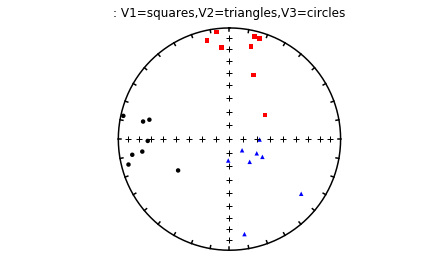

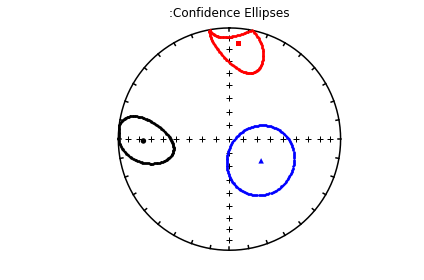

In [74]:
ipmag.aniso_magic_nb(dir_path='Chapter_13/Problem_1')

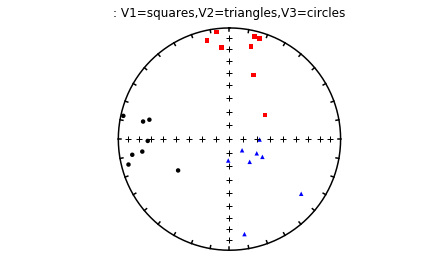

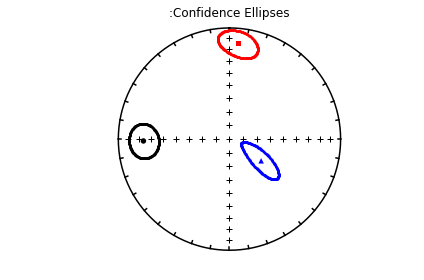

In [75]:
ipmag.aniso_magic_nb(dir_path='Chapter_13/Problem_1',ihext=0,iboot=1)

The bootstrapped confidence ellipses seem to "follow the data" better.  

## Problem 2a

First we need to read in the dike orientation information with Pandas, transform them to their poles, and calculate the mean pole, assuming a Fisher distribution.   We can use Pandas and Numpy for this.

In [31]:
import pandas as pd
import numpy as np

In [32]:
dd=pd.read_csv("Chapter_13/Problem_2/dike.dd",delim_whitespace=True,header=None) #read in data
dd=pd.DataFrame(dd) # make a Pandas DataFrame
dd.columns=["DipDir","Dip"] # Assign column headers
dd['PoleDip']=90.-dd['Dip'] # find the pole dip
poles=np.array([dd["DipDir"],dd["PoleDip"]]).transpose() # make a numpy array
ipmag.fisher_mean(di_block=poles)


{'alpha95': 46.191359900402126,
 'csd': 49.657726212930342,
 'dec': 103.86274387036212,
 'inc': 18.402093151299596,
 'k': 2.6607028719617651,
 'n': 7,
 'r': 4.7449567694208055}

## Problem 2b

First we will plot the data for each site along with the Hext ellipses:

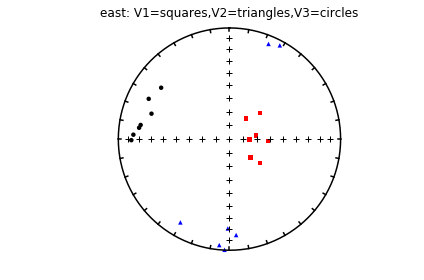

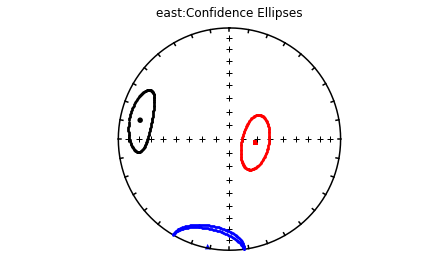

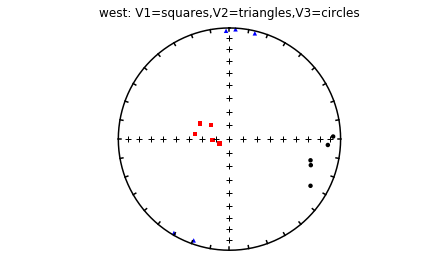

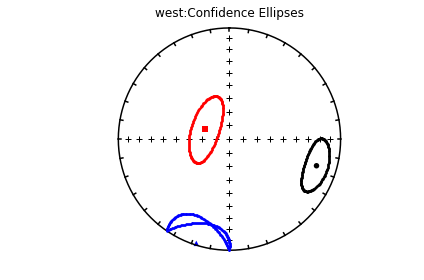

In [68]:
ipmag.aniso_magic_nb(dir_path='Chapter_13/Problem_2',crd='g',\
                     samp_file='samples.txt',site_file='sites.txt',isite=1)

And now the parametric bootstrap.

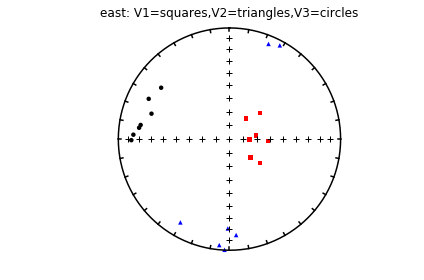

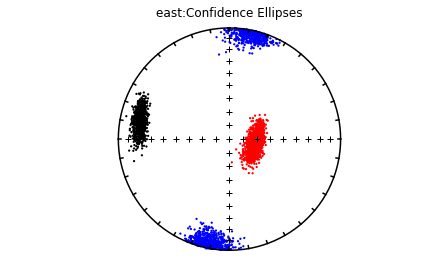

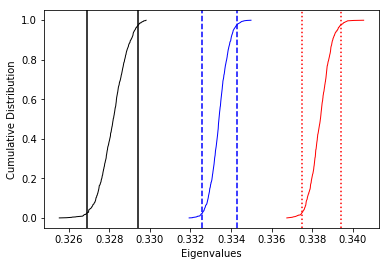

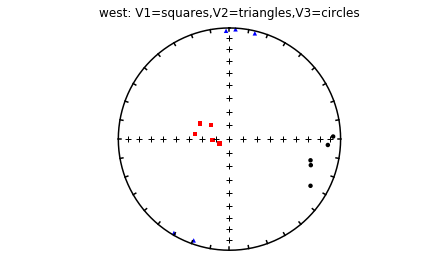

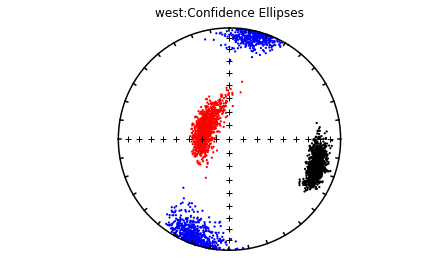

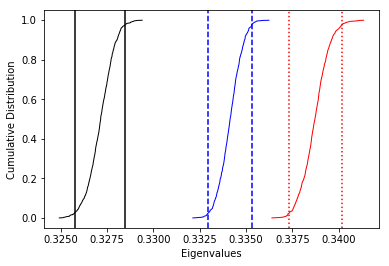

In [70]:
ipmag.aniso_magic_nb(dir_path='Chapter_13/Problem_2',crd='g',ihext=0,iboot=1,\
                     ipar=1,ivec=1,isite=1,\
                     samp_file='samples.txt',site_file='sites.txt')

## Problem 2c

Here we put on the dike plane by passing the pole direction calculated in 2a as PDir:

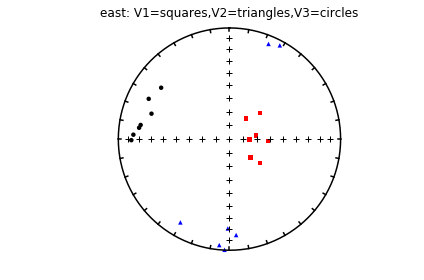

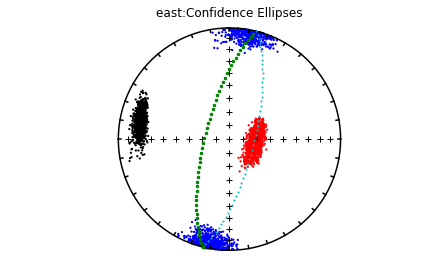

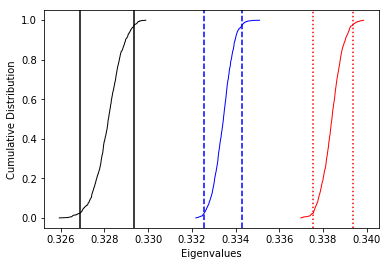

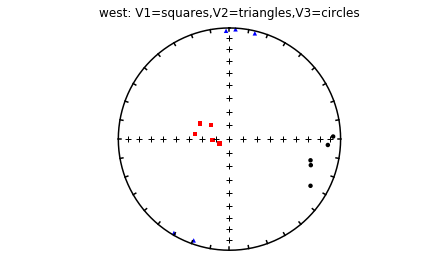

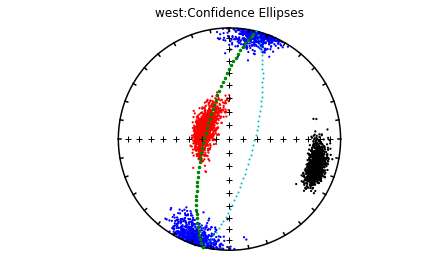

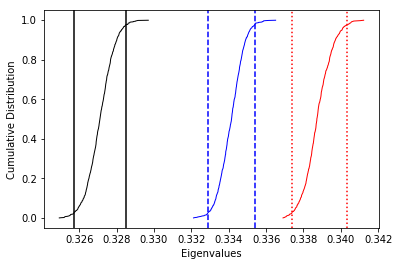

In [76]:
ipmag.aniso_magic_nb(dir_path='Chapter_13/Problem_2',crd='g',ihext=0,iboot=1,\
                     ipar=1,ivec=1,isite=1,PDir=[104,18],\
                     samp_file='samples.txt',site_file='sites.txt')

These are downward directed directions and the green dots are on the lower trace of the dike plane.  The Eastern margin data plot to the east of the dike plane and the western side plots pretty much on the plane.  From this, we can infer that the magma was flowing nearly vertically up.  

## Problem 3

Download the datafile by clicking on the icon in the Data column from this website:  
http://earthref.org/MAGIC/1984/
and put it in a new Project Directory (here called Chapter_13/Problem_3).  We use **ipmag.download_magic** to unpack the dataset.  

In [77]:
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='.', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir : str
        input directory (default ".")
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    data_model : float
        MagIC data model 2.5 or 3 (default 3)
    separate_locs : bool
        create a sep

In [79]:
ipmag.download_magic('magic_contribution_12166.txt',\
                     input_dir_path='Chapter_13/Problem_3',\
                     dir_path='Chapter_13/Problem_3')
                     


working on:  'contribution'
1  records written to file  Chapter_13/Problem_3/contribution.txt
contribution  data put in  Chapter_13/Problem_3/contribution.txt
working on:  'locations'
1  records written to file  Chapter_13/Problem_3/locations.txt
locations  data put in  Chapter_13/Problem_3/locations.txt
working on:  'sites'
6  records written to file  Chapter_13/Problem_3/sites.txt
sites  data put in  Chapter_13/Problem_3/sites.txt
working on:  'samples'
17  records written to file  Chapter_13/Problem_3/samples.txt
samples  data put in  Chapter_13/Problem_3/samples.txt
working on:  'specimens'
49  records written to file  Chapter_13/Problem_3/specimens.txt
specimens  data put in  Chapter_13/Problem_3/specimens.txt
working on:  'measurements'
735  records written to file  Chapter_13/Problem_3/measurements.txt
measurements  data put in  Chapter_13/Problem_3/measurements.txt


True

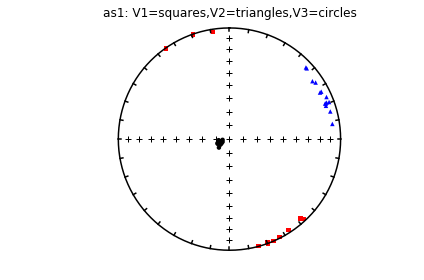

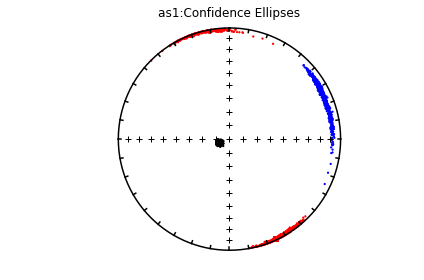

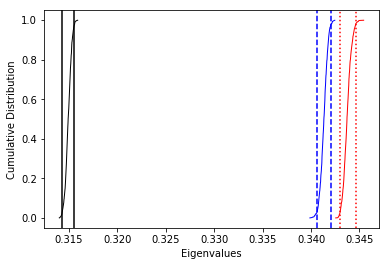

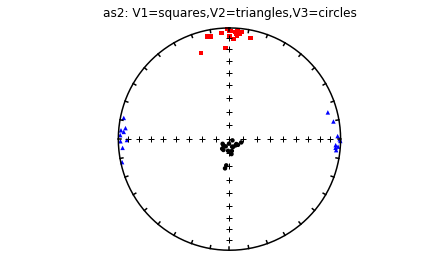

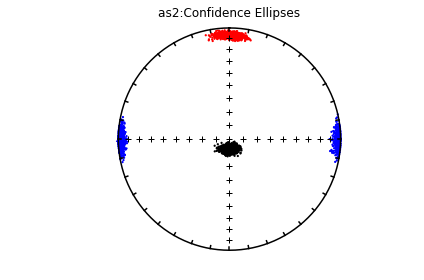

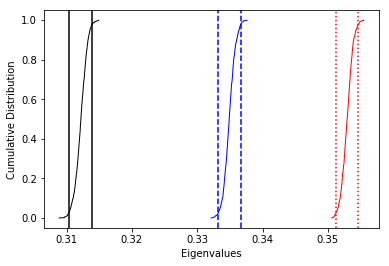

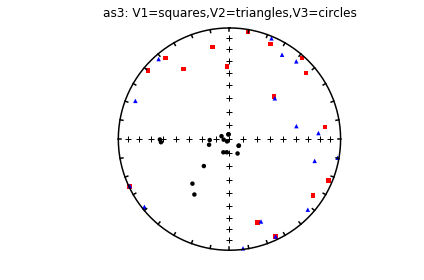

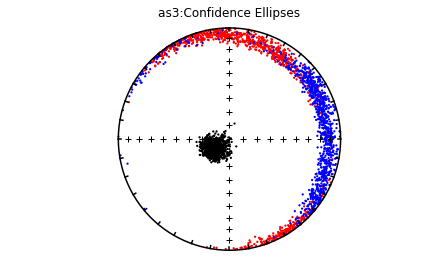

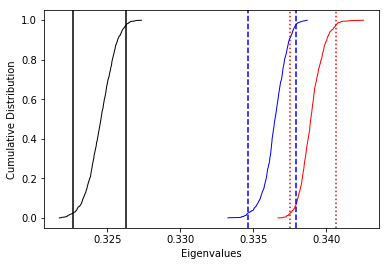

In [81]:
ipmag.aniso_magic_nb(dir_path='Chapter_13/Problem_3',ihext=0,iboot=1,\
                     ipar=1,ivec=1,isite=1,\
                     samp_file='samples.txt',site_file='sites.txt')

Site as3 has an oblate fabric because the maxima (red squares) and intermediate (blue triangles) overlap and are not distinct.  This is also apparent in the plots of cdfs of bootstrapped eigenvalues.  So as3 is a primary sedimentary fabric.  The other two are more (as2) or less (as1) disturbed.  The site as1 must be the cryptoslump.  